# Importing Libraries

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Time Series Prediction/Super_Store_data (1).csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# Extracting the Time Series

In [5]:
df.Category.unique()

array(['Furniture'], dtype=object)

We see that the dataset contains data for three product category, namely Furniture, Office supplies and technology. Lets first try to forecast sales of furnitures.

In [6]:
df.shape

(2121, 21)

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [9]:
df['Order Date'].min(), df['Order Date'].max()

('1/1/2017', '9/9/2017')

In [12]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [13]:
df.drop(cols, axis=1, inplace=True)
df.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


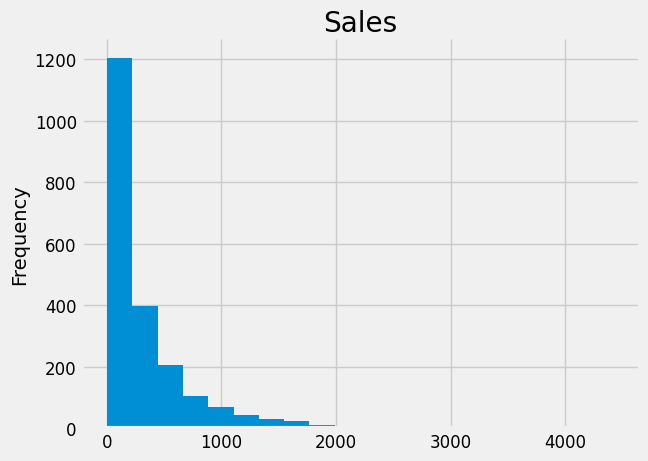

In [16]:
# @title Sales

from matplotlib import pyplot as plt
df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df= df.sort_values('Order Date')
df.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [15]:
df.shape

(2121, 2)

# Data Cleaning

In [17]:
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [18]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()
df.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


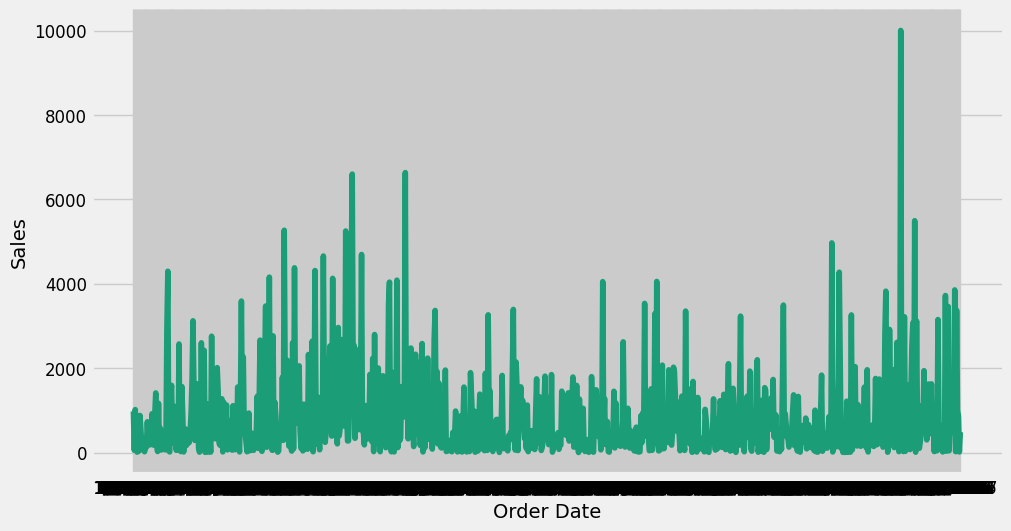

In [20]:
# @title Order Date vs Sales

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

In [19]:
df.shape

(889, 2)

## Setting date as index

In [21]:
df = df.set_index('Order Date')
df.index

Index(['1/1/2017', '1/10/2014', '1/10/2015', '1/10/2016', '1/11/2014',
       '1/11/2016', '1/12/2017', '1/13/2014', '1/13/2015', '1/13/2017',
       ...
       '9/7/2014', '9/7/2015', '9/7/2017', '9/8/2014', '9/8/2015', '9/8/2016',
       '9/8/2017', '9/9/2014', '9/9/2016', '9/9/2017'],
      dtype='object', name='Order Date', length=889)

## Resampling

Since our order dates are daily, we will resample it to monthly to somewhat smoothen it out

In [25]:
import pandas as pd

# Assuming df is your DataFrame containing the 'Sales' column
# Convert the index to datetime index if it's not already
df.index = pd.to_datetime(df.index)

# Now, you can proceed with resampling
y = df['Sales'].resample('MS').mean()
y['2017':]


Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Plotting the time series

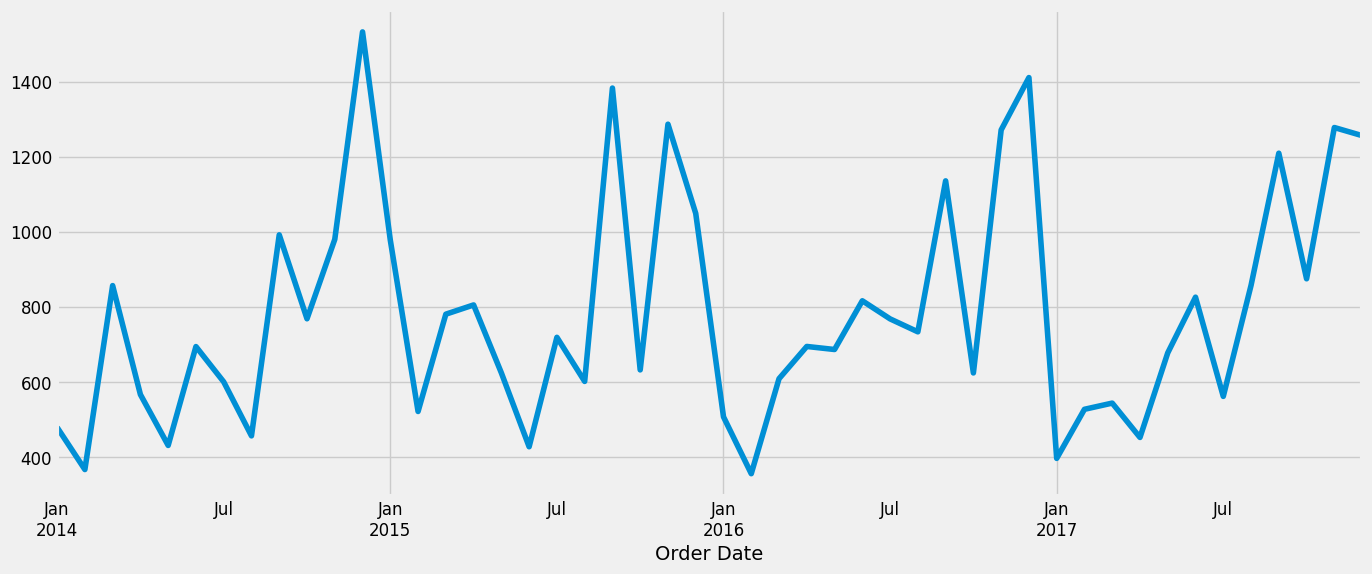

In [26]:
y.plot(figsize=(15, 6))
plt.show()

Observations from above figure:

1. The time-series has seasonality pattern, sales are low at the beginning of the year and high at the end of the year.
2. There is an upward trend within any single year with low months in the mid of the year.

## Stationarity Check

We will try the following to ensure stationarity of the series:

1. Time series decomposition
2. ADF test

### Time series decomposition

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term

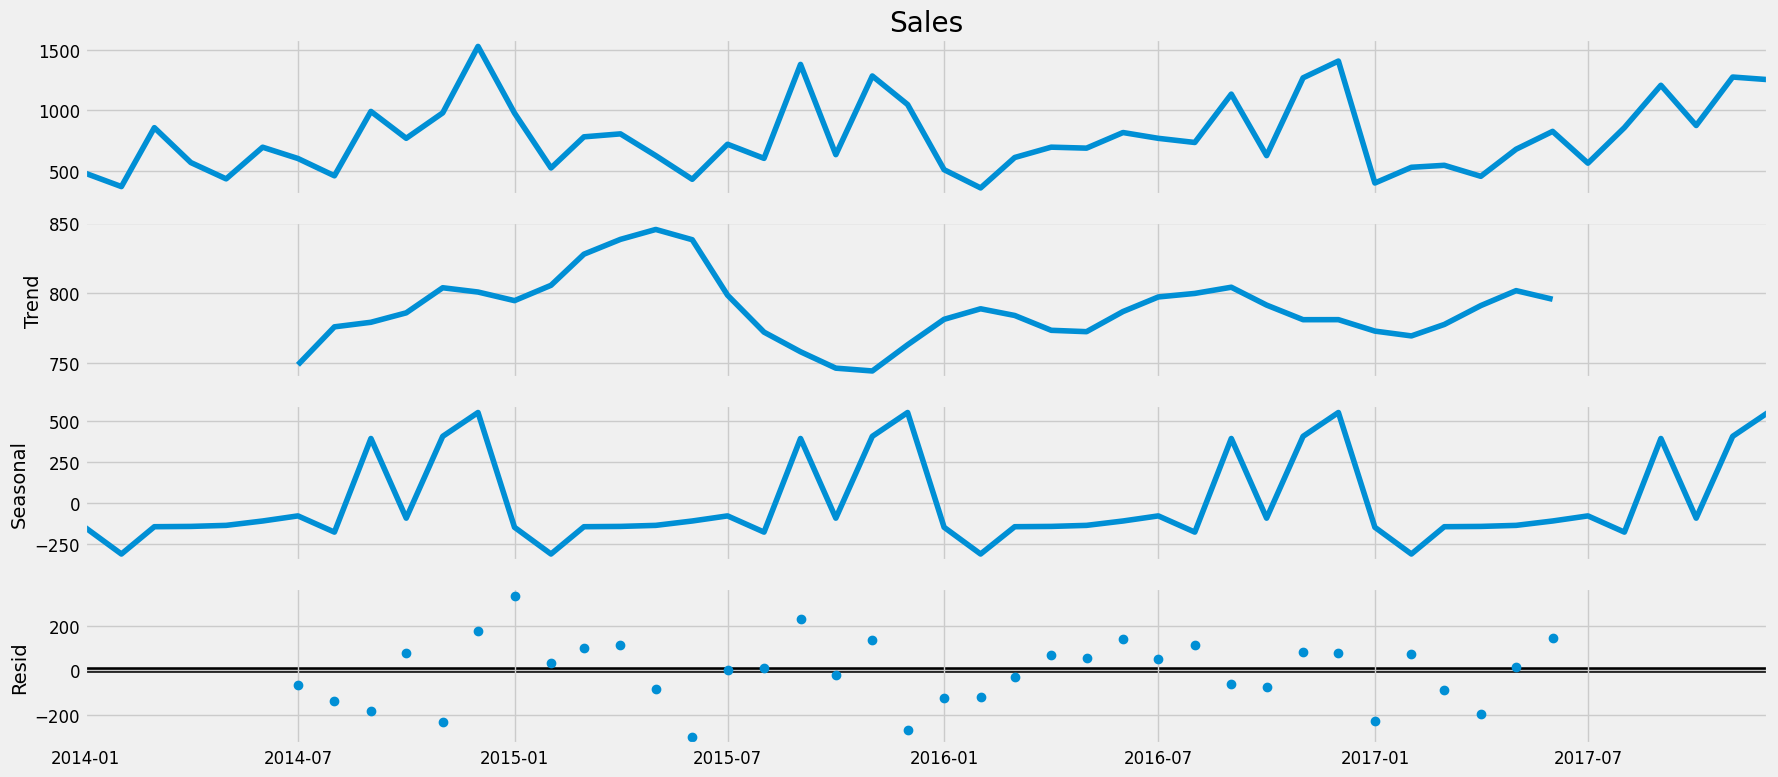

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### ADF Test

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
def test_adfuller(data):
    res=adfuller(data,maxlag=16)
    labels=['ADF Test Statistic','p-value','#Lags Used','No. of obs. used']
    for label, value in zip(labels,res):
        print(label+':'+str(value))
    if res[1]<=0.05:
        print('H0 is rejected, series is stationary')
    else:
        print('Failed to reject H0, series is not stationary')

In [30]:
test_adfuller(y)

ADF Test Statistic:-2.4399517684865506
p-value:0.1307762660460255
#Lags Used:11
No. of obs. used:36
Failed to reject H0, series is not stationary


##### 1. The ADF test statistic is -2.4399517684865506, and the p-value is 0.1307762660460255. With a p-value greater than the typical significance levels (0.05 or 0.01), we fail to reject the null hypothesis (H0). Therefore, we do not have enough evidence to conclude that the series is stationary.

##### 2. The p-value being greater than 0.05 suggests that there is a significant probability that the non-stationarity observed in the series is due to random noise rather than a systematic pattern. Thus, the series likely exhibits some form of trend or seasonality.

##### 3. But! Here's where it gets interesting. The test also tells us it had to look back 11 periods to spot any changes in sales. That could mean there's something happening every 11 periods that affects sales. Maybe it's a seasonal promotion, or perhaps customers tend to buy more every 11 weeks. It's like spotting a pattern in the chaos.



## Trying Differencing

Lets see if differencing the series could make the series stationary

In [31]:
ydf=pd.DataFrame(y)
ydf.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [32]:
ydf['First difference']=ydf['Sales']-ydf['Sales'].shift(1)
ydf['First seasonal difference']=ydf['Sales']-ydf['Sales'].shift(12)

In [33]:
ydf.head()

,Sales,First difference,First seasonal difference
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,-112.262631,NaN
2014-03-01,857.291529,489.359929,NaN
2014-04-01,567.488357,-289.803172,NaN
2014-05-01,432.049188,-135.439170,NaN


In [34]:
test_adfuller(ydf['First difference'].dropna())

ADF Test Statistic:-2.368598265022101
p-value:0.1507961310307795
#Lags Used:13
No. of obs. used:33
Failed to reject H0, series is not stationary


In [35]:
test_adfuller(ydf['First seasonal difference'].dropna())

ADF Test Statistic:-2.9650929157929644
p-value:0.03828538689947868
#Lags Used:16
No. of obs. used:19
H0 is rejected, series is stationary


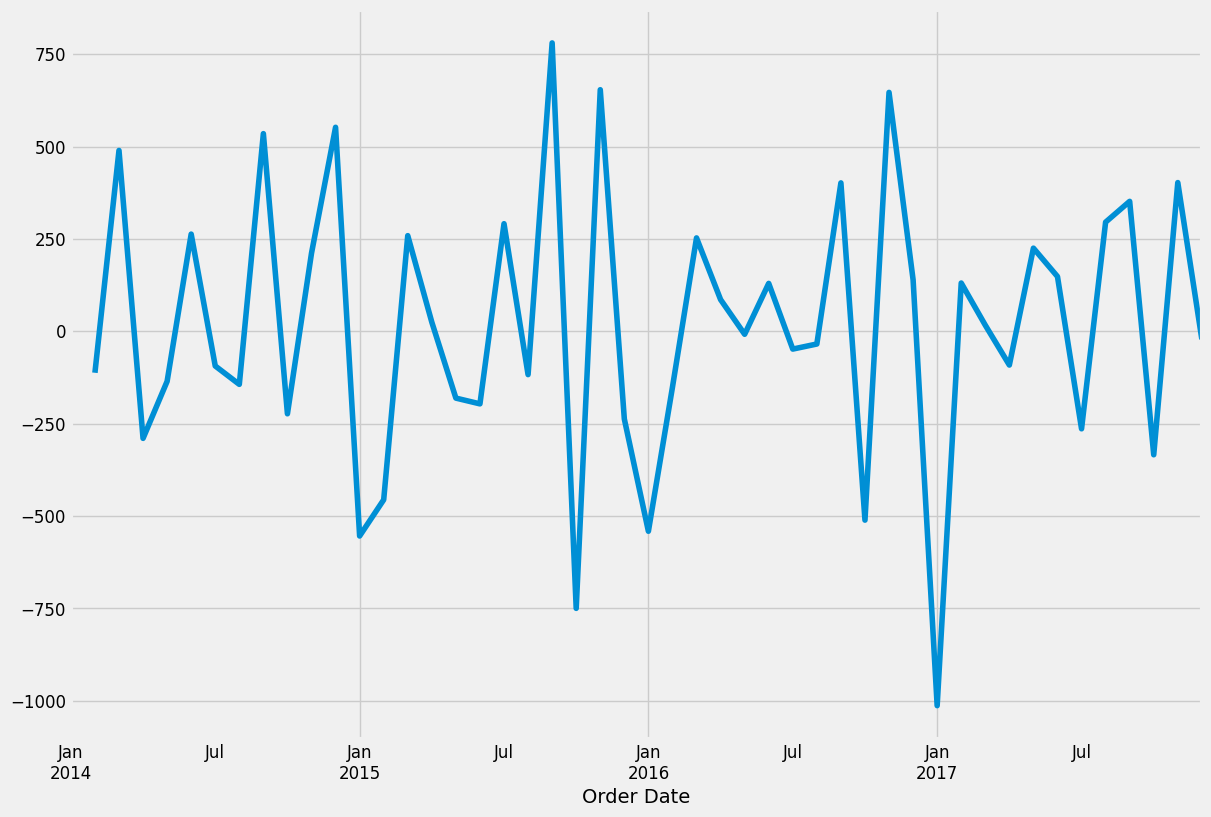

In [36]:
rcParams['figure.figsize'] = 18, 8
ydf['First difference'].plot(figsize=(13,9));

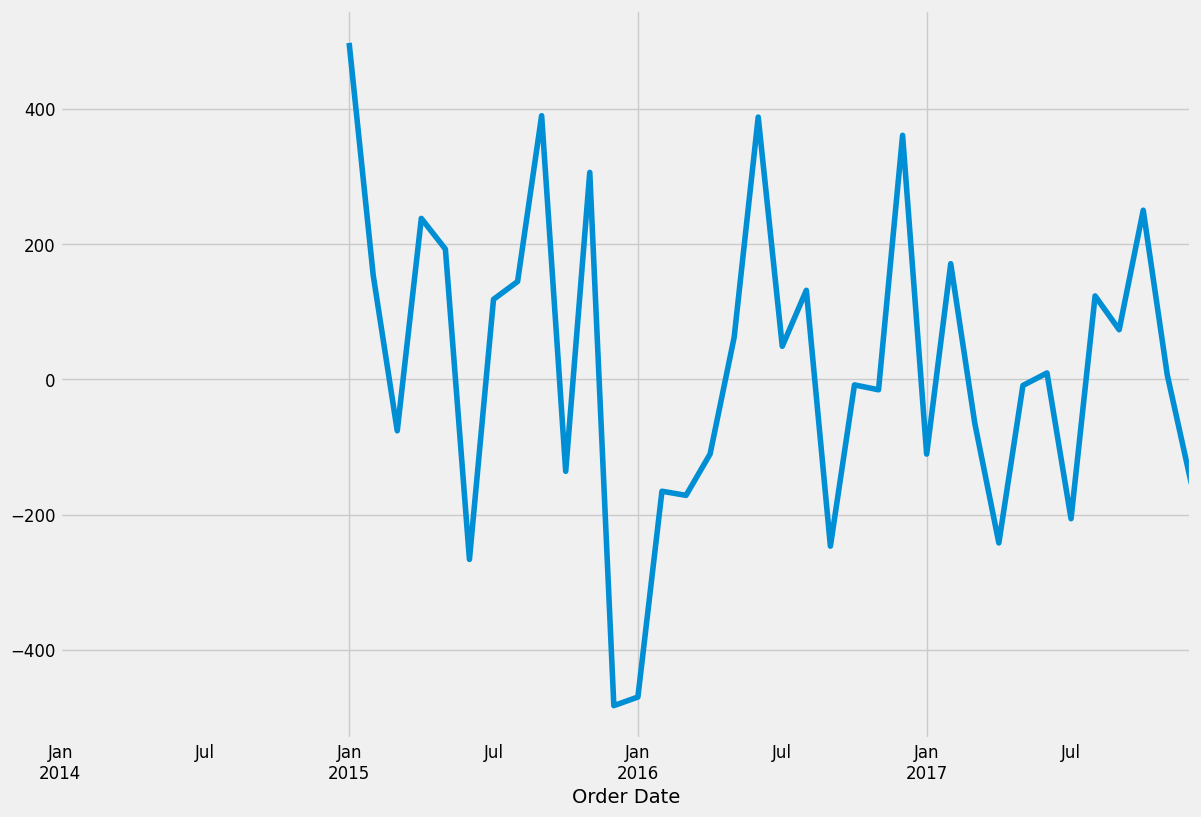

In [37]:
rcParams['figure.figsize'] = 18, 8
ydf['First seasonal difference'].plot(figsize=(13,9));

OBSERVATIONS:
    
- Seasonal differencing with 12 months period once removes the seasonality.

## ACF and PACF plots

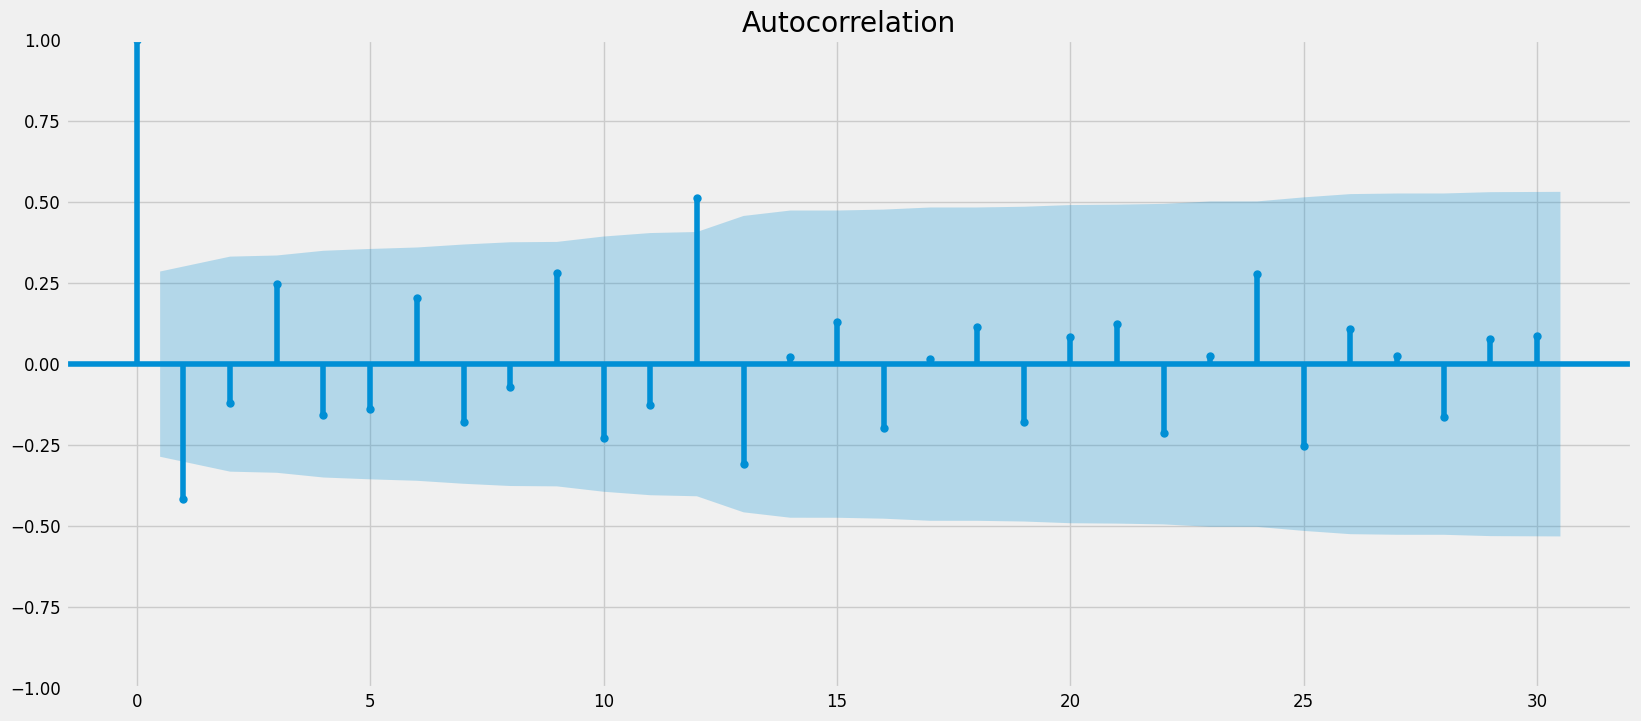

In [38]:
sm.graphics.tsa.plot_acf(ydf['First difference'].iloc[1:],lags=30);

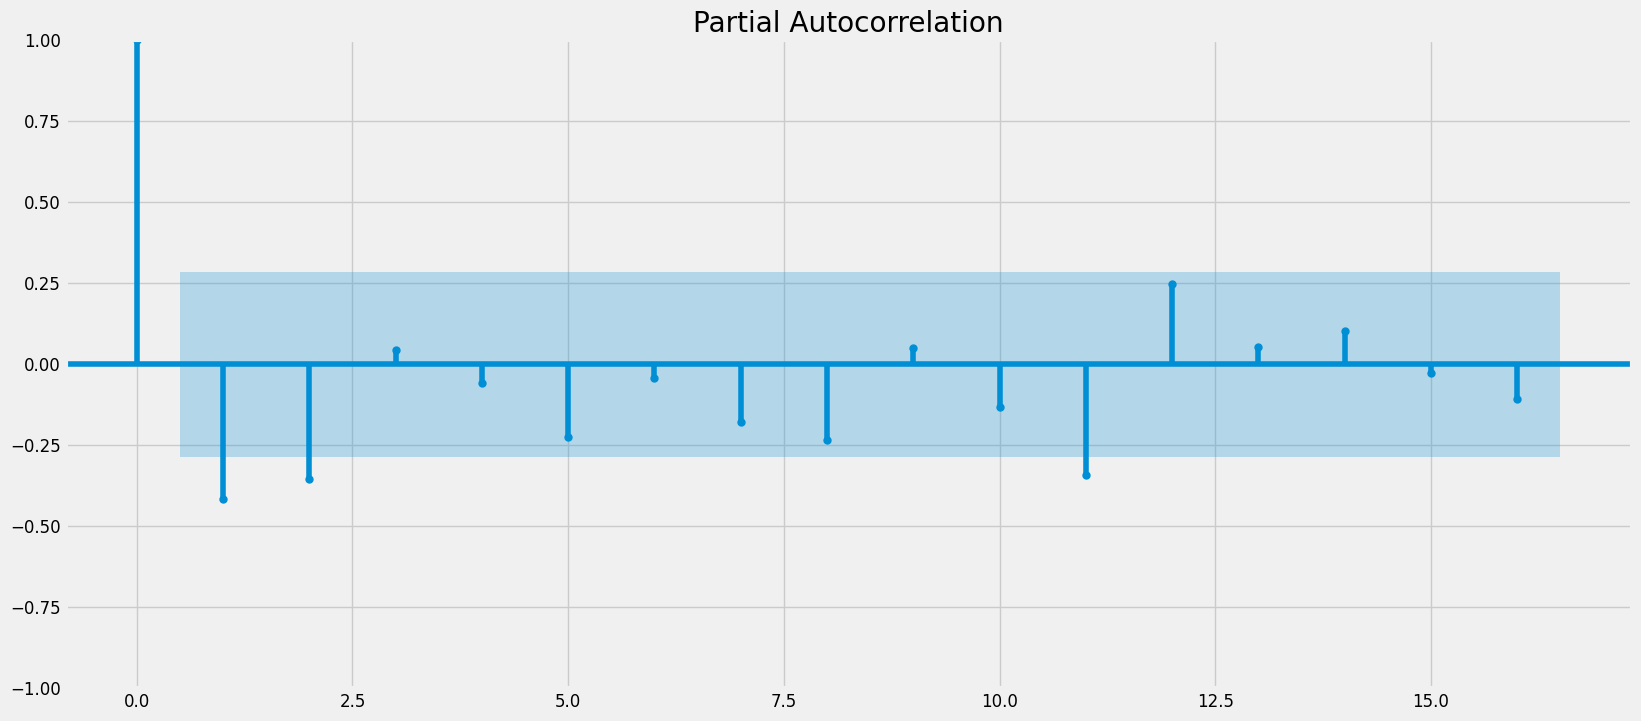

In [39]:
sm.graphics.tsa.plot_pacf(ydf['First difference'].iloc[1:],lags=16);

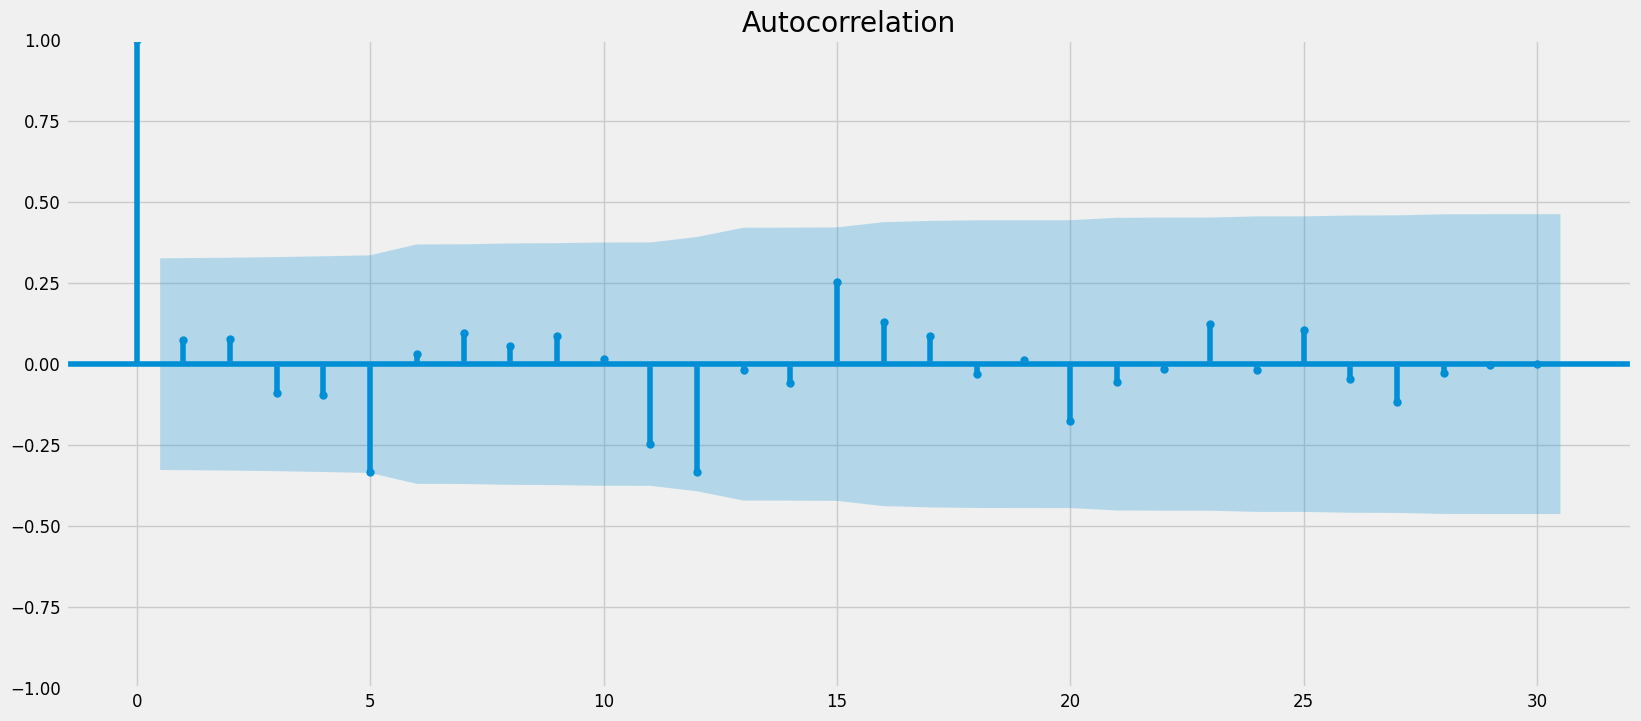

In [40]:
sm.graphics.tsa.plot_acf(ydf['First seasonal difference'].iloc[12:],lags=30);

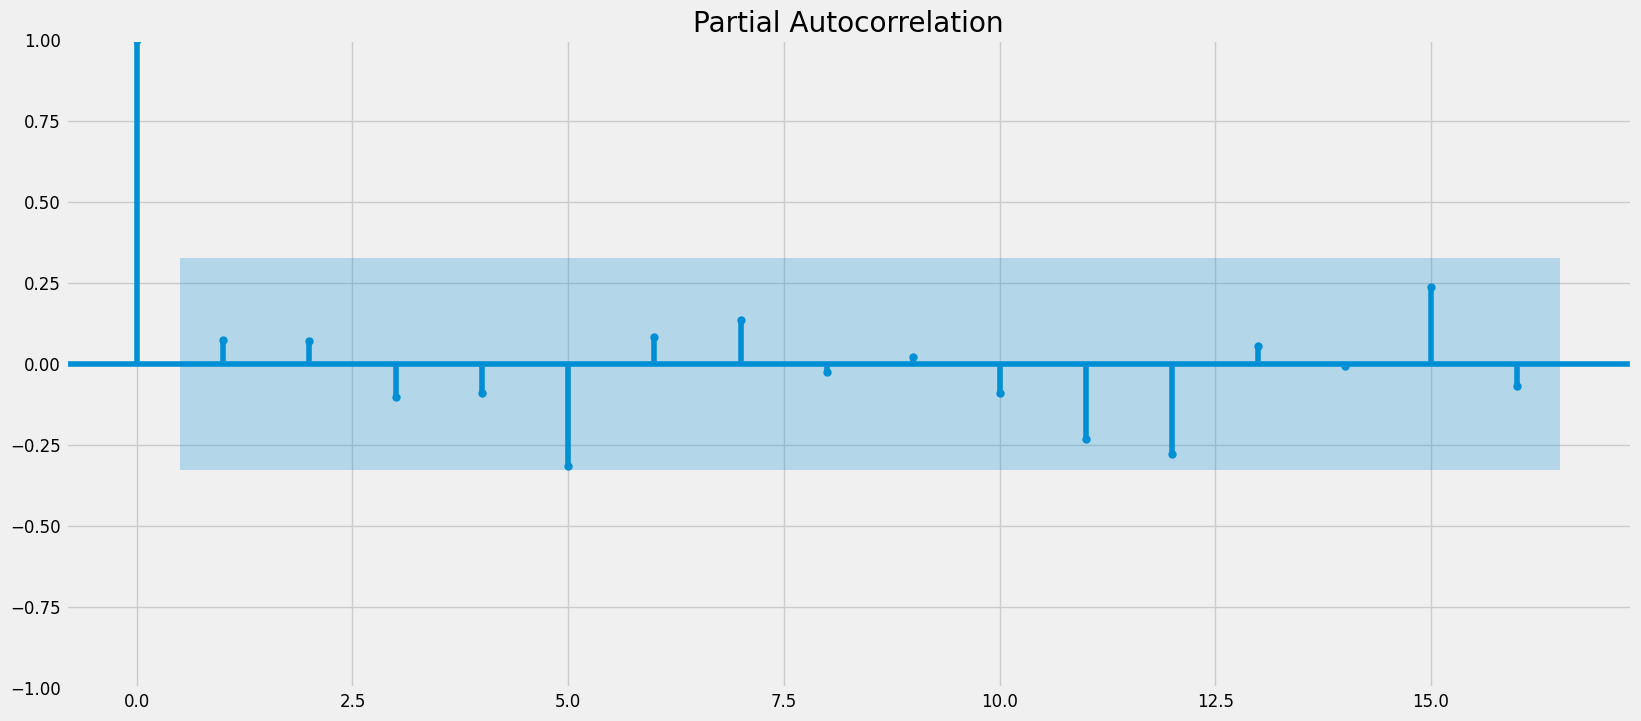

In [41]:
sm.graphics.tsa.plot_pacf(ydf['First seasonal difference'].iloc[12:],lags=16);

Obeservations:
    
1. From PACF plot, It looks like that using AR with lag 1 will be good for trend and AR with lag 0 for seasonality.
2. Similarly from ACF plot, it seems that MA with lag 1 will be good for trend and AR with lag 0 for seasonality.

## Implementing Sarimax

### Using grid search

Although we have an intution via differencing to use p=d=q=1 for Sarimax, Nonetheless lets try to use grid search to confirm or revise out initial guess.

In [42]:
#Generating Triplets
p = d = q = range(0, 2)

In [43]:
pdq = list(itertools.product(p, d, q))

In [44]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

Note: To prevent overfitting, lets start with simpler seasonal parameters.

In [45]:
seasonal_pdq=[(0,0,0,12),
              (0,1,0,12)]

### Train Test Split

In [70]:
train=y[:-15]
test=y[-15:]

In [71]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:521.6318256903471
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:279.6698825455363
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:486.83483707732853
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:268.22512481134027
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:455.55348730805747
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:277.1800675625434
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:431.09346202361905
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:258.3790052353366
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:470.34955023392035
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:281.2058741135805
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:448.3632797742548
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:270.13924631921964
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:451.4294707151072
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:274.8814060048545
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:431.8011612512764
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:260.2134105788922


#### We see that ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:258.3790052353366

### Initializing best parameters

In [72]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                 )
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1296      0.287      0.452      0.652      -0.433       0.692
ma.L1         -0.8362      0.273     -3.058      0.002      -1.372      -0.300
sigma2      7.728e+04   2.59e+04      2.982      0.003    2.65e+04    1.28e+05


## Checking Model Diagnostics

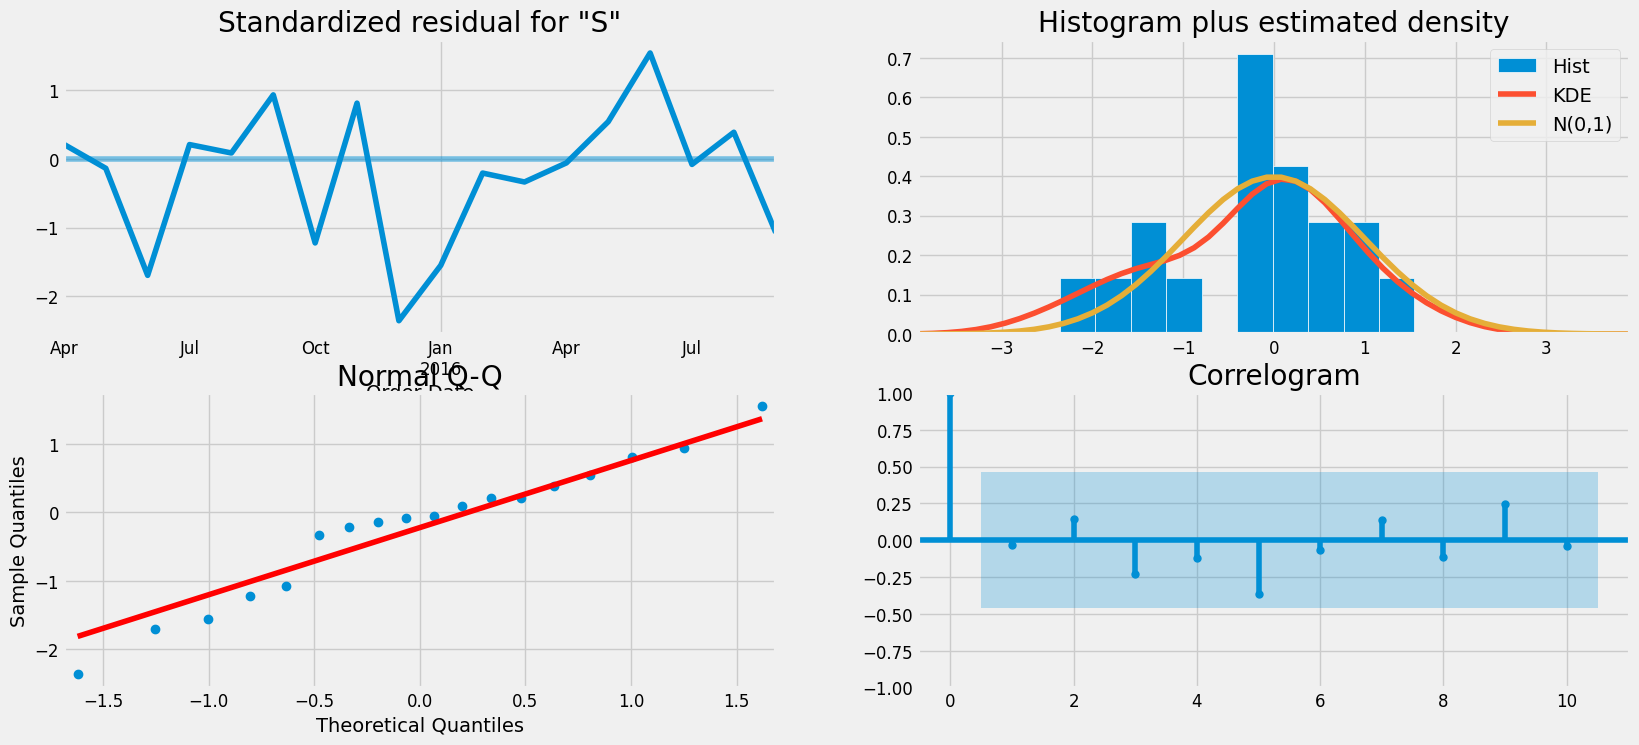

In [73]:
results.plot_diagnostics()
plt.show()

## Model Validation

In [74]:
pred=results.get_forecast(steps=8)
pred_ci=pred.conf_int()

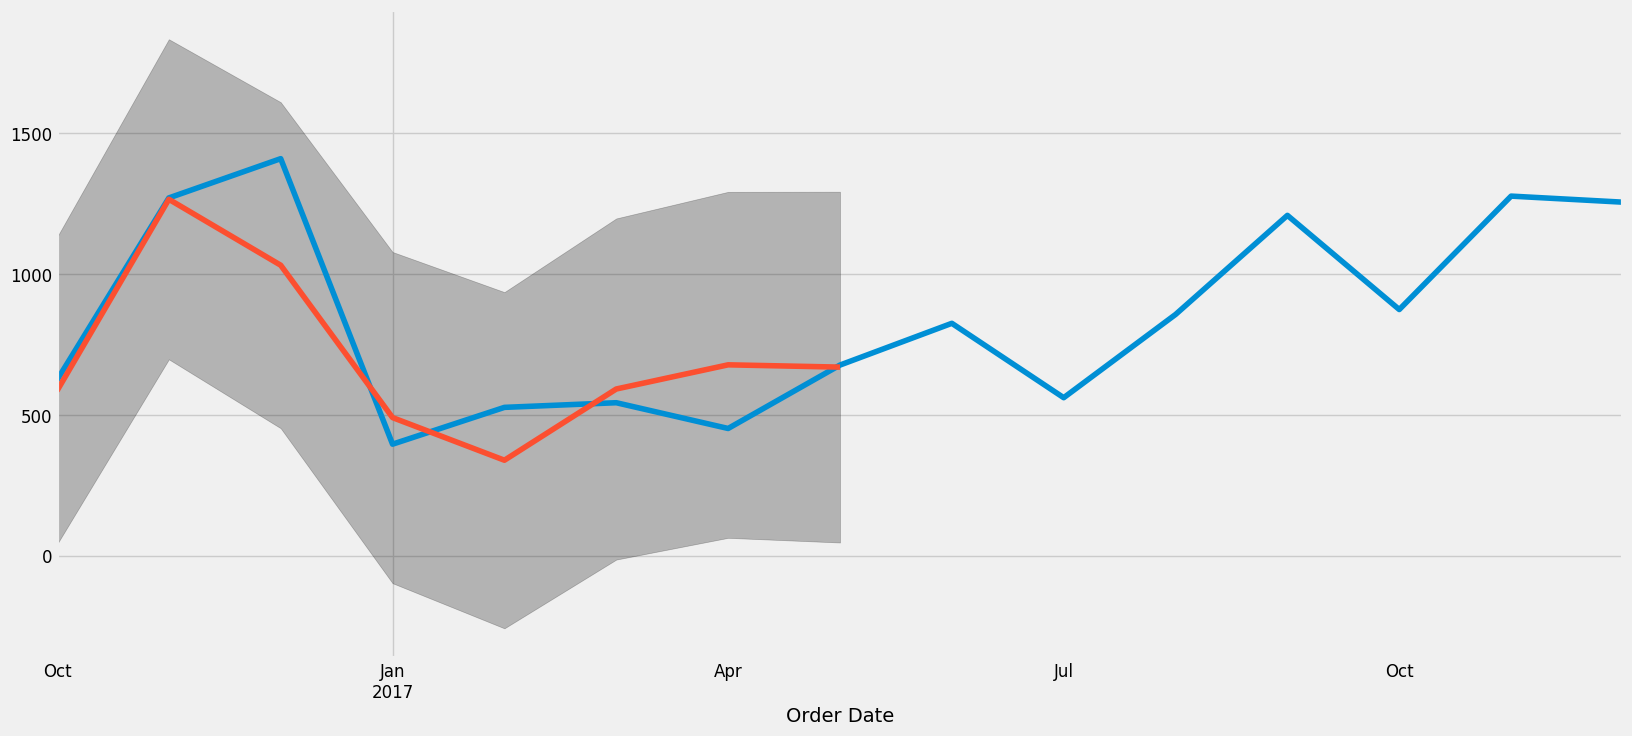

In [51]:
ax=test.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Predicted')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25);

Conclusion: We see that our results are well within the confidence interval.

## MSE and RMSE Calculation

In [52]:
test_forecast=pred.predicted_mean
mse_forecast=((test-test_forecast)**2).mean()
print('mse={}'.format(mse_forecast))

mse=30239.20983958362


In [53]:
print('rmse={}'.format(np.sqrt(mse_forecast)))

rmse=173.8942490123915


In [54]:
y.min(),y.max()

(356.8682727272727, 1532.298325)

In a time series with fluctuations in between (356.8, 1532.2), rmse with a value of 136 seems to be good.

# Future forecasts

In [55]:
mod_final=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)

In [56]:
results_f=mod_final.fit()

In [57]:
pred_f=results_f.get_forecast(steps=50)

In [58]:
pred_f_ci=pred_f.conf_int()

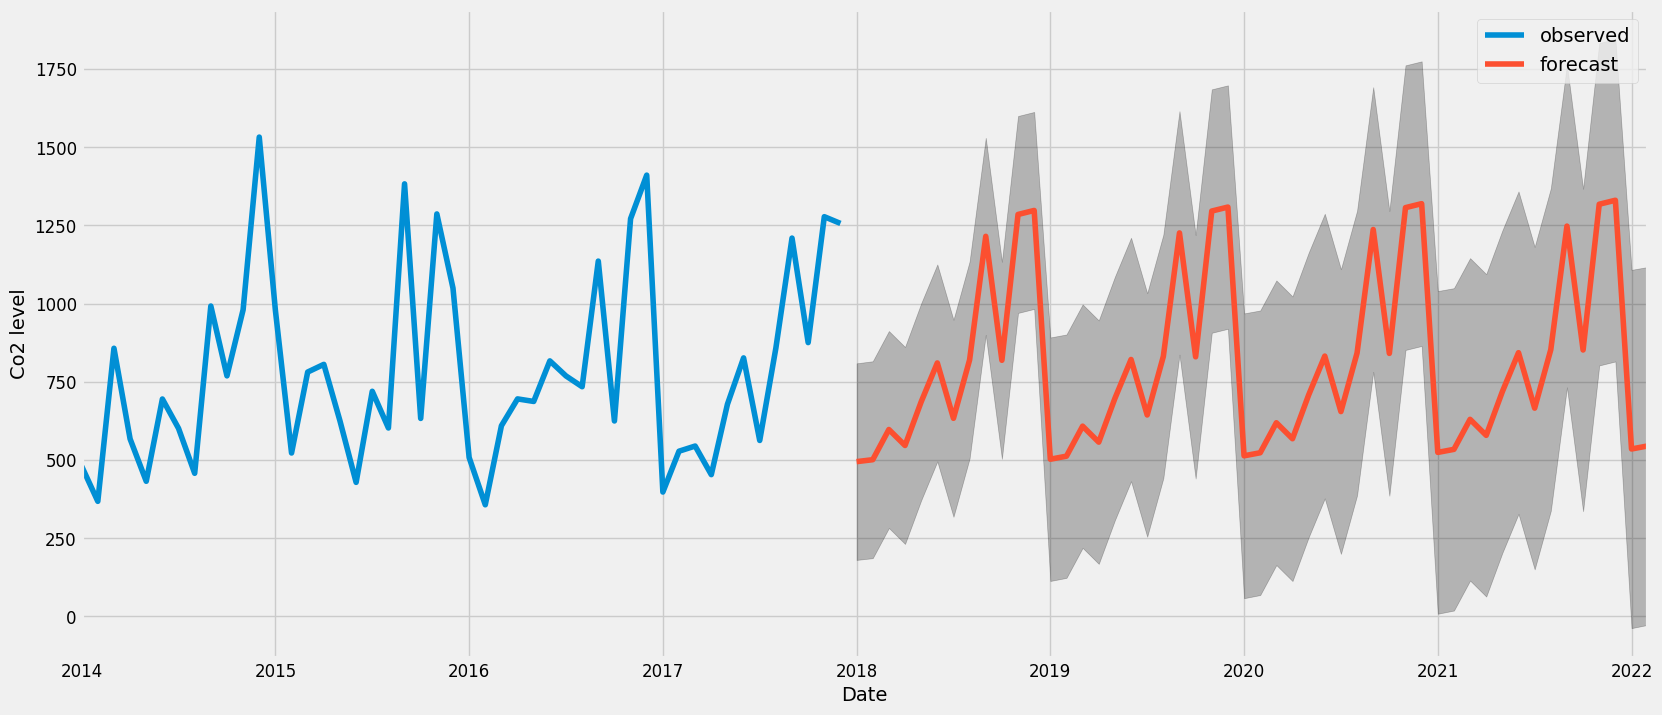

In [59]:
ax=y.plot(label='observed')
pred_f.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(pred_f_ci.index,pred_f_ci.iloc[:,0],pred_f_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Co2 level')
plt.legend()
plt.show();

In [60]:
y_f=pred_f.predicted_mean

In [61]:
type(y_f)

pandas.core.series.Series

In [62]:
y_f.to_csv('predictions.csv')